# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! In this tutorial, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial or use "File -> Open in playground mode" to play with it yourself.


# Install detectron2

In [1]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
#!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
#!pip install cython pyyaml==5.1
#!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
#!gcc --version
# opencv is pre-installed on colab

'1.4.0+cu100'

In [0]:
# install detectron2:
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

In [3]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

In [24]:
detectron2?

# Run a pre-trained detectron2 model

We first download a random image from the COCO dataset:

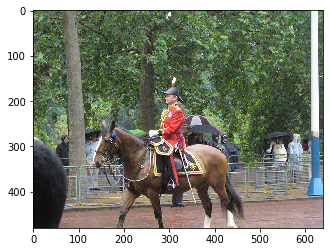

In [4]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")
#cv2_imshow(im)
#cv2.imshow('image',im)
plt.imshow(im[:,:,::-1])

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

full-path of model zoo:

/home/ny/anaconda3/envs/detectron2/lib/python3.6/site-packages/detectron2/model_zoo



In [5]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [6]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[126.6035, 244.8977, 459.8292, 480.0000],
        [251.1083, 157.8127, 338.9731, 413.6379],
        [114.8496, 268.6864, 148.2352, 398.8111],
        [  0.8217, 281.0327,  78.6072, 478.4210],
        [ 49.3954, 274.1229,  80.1545, 342.9808],
        [561.2248, 271.5816, 596.2755, 385.2552],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9295, 278.3744, 562.2792, 389.3802],
        [335.2409, 251.9167, 414.7491, 275.9375],
        [350.9300, 269.2060, 386.0984, 297.9081],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2656, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8767, 283.3257, 529.9403, 324.0392],
        [594.5663, 283.4820, 609.0577, 311.4124]], device='cuda:0'))

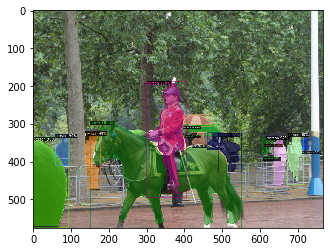

In [7]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image())
#cv2_imshow(v.get_image()[:, :, ::-1])

# Train on a custom dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.

We'll train a balloon segmentation model from an existing model pre-trained on COCO dataset, available in detectron2's model zoo.

## Prepare the dataset

### Play with my own data

From "labelme json" to "coco-formated json":
https://www.dlology.com/blog/how-to-create-custom-coco-data-set-for-instance-segmentation/

Load "coco-formated json" to make a "list of dictionaries":
https://www.dlology.com/blog/how-to-train-detectron2-with-custom-coco-datasets/

In [8]:
MetadataCatalog.list()

['coco_2014_train',
 'coco_2014_val',
 'coco_2014_minival',
 'coco_2014_minival_100',
 'coco_2014_valminusminival',
 'coco_2017_train',
 'coco_2017_val',
 'coco_2017_test',
 'coco_2017_test-dev',
 'coco_2017_val_100',
 'keypoints_coco_2014_train',
 'keypoints_coco_2014_val',
 'keypoints_coco_2014_minival',
 'keypoints_coco_2014_valminusminival',
 'keypoints_coco_2014_minival_100',
 'keypoints_coco_2017_train',
 'keypoints_coco_2017_val',
 'keypoints_coco_2017_val_100',
 'coco_2017_train_panoptic_separated',
 'coco_2017_train_panoptic_stuffonly',
 'coco_2017_val_panoptic_separated',
 'coco_2017_val_panoptic_stuffonly',
 'coco_2017_val_100_panoptic_separated',
 'coco_2017_val_100_panoptic_stuffonly',
 'lvis_v0.5_train',
 'lvis_v0.5_val',
 'lvis_v0.5_val_rand_100',
 'lvis_v0.5_test',
 'lvis_v0.5_train_cocofied',
 'lvis_v0.5_val_cocofied',
 'cityscapes_fine_instance_seg_train',
 'cityscapes_fine_sem_seg_train',
 'cityscapes_fine_instance_seg_val',
 'cityscapes_fine_sem_seg_val',
 'cityscap

In [196]:
#MetadataCatalog.get(name).set()

In [9]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("eye_train", {}, "./eye/train/train.json", "./eye/train")
register_coco_instances("eye_val", {}, "./eye/val/val.json", "./eye/val")

#from detectron2.data import DatasetCatalog, MetadataCatalog
#for d in ["train", "val"]:
#    DatasetCatalog.register("eye_" + d, lambda d=d: load_coco_json("eye/train/{}.json".format(d), "eye/()".format(d)))
#    MetadataCatalog.get("eye_" + d).set(thing_classes=["eye"])
eye_metadata = MetadataCatalog.get("eye_train")

How to clear the registered dataset?
https://github.com/facebookresearch/detectron2/blob/master/detectron2/data/catalog.py

In [11]:
#print(type(DatasetCatalog._REGISTERED)   )
#DatasetCatalog._REGISTERED.keys()
#del DatasetCatalog._REGISTERED['eye_train']

In [12]:
eye_metadata

Metadata(evaluator_type='coco', image_root='./eye/train', json_file='./eye/train/train.json', name='eye_train')

In [13]:
from detectron2.data.datasets.coco import load_coco_json

[06/07 22:53:25 d2.data.datasets.coco]: Loaded 3 images in COCO format from eye/train/train.json


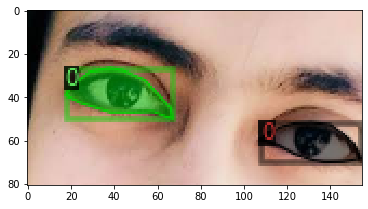

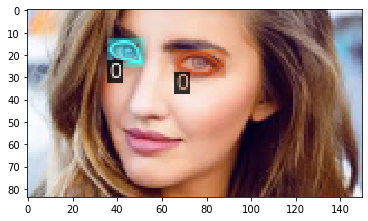

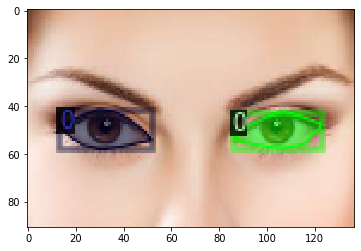

In [14]:
eye_dicts = load_coco_json("eye/train/train.json", "eye/train")
for d in eye_dicts:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=eye_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    #cv2_imshow(vis.get_image()[:, :, ::-1])
    plt.imshow(vis.get_image())
    plt.show()

## Train!

Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the balloon dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.


In [15]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("eye_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4  ## = 2  
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/07 22:53:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [06/07 22:53:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/07 22:53:52 d2.data.datasets.coco]: Loaded 3 images in COCO format from ./eye/train/train.json
[06/07 22:53:52 d2.data.build]: Removed 0 images with no usable annotations. 3 images left.
[06/07 22:53:52 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    eye     | 6            |
|            |              |
[06/07 22:53:52 d2.data.common]: Serializing 3 elements to byte tensors and concatenating them all ...
[06/07 22:53:52 d2.data.common]: Serialized dataset takes 0.00 MiB
[06/07 22:53:52 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[06/07 22:53:52 d2.data.build]: Using training sampler TrainingSampler


'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (2, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (2,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (4, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (4,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (1,) in the model! Skipped.


[06/07 22:53:52 d2.engine.train_loop]: Starting training from iteration 0
[06/07 22:53:55 d2.utils.events]:  eta: 0:01:54  iter: 19  total_loss: 2.179  loss_cls: 0.786  loss_box_reg: 0.683  loss_mask: 0.690  loss_rpn_cls: 0.012  loss_rpn_loc: 0.009  time: 0.1174  data_time: 0.0100  lr: 0.000005  max_mem: 1776M
[06/07 22:53:57 d2.utils.events]:  eta: 0:01:55  iter: 39  total_loss: 2.178  loss_cls: 0.704  loss_box_reg: 0.748  loss_mask: 0.683  loss_rpn_cls: 0.023  loss_rpn_loc: 0.009  time: 0.1208  data_time: 0.0016  lr: 0.000010  max_mem: 1776M
[06/07 22:54:00 d2.utils.events]:  eta: 0:01:54  iter: 59  total_loss: 2.046  loss_cls: 0.583  loss_box_reg: 0.740  loss_mask: 0.668  loss_rpn_cls: 0.008  loss_rpn_loc: 0.009  time: 0.1222  data_time: 0.0016  lr: 0.000015  max_mem: 1776M
[06/07 22:54:02 d2.utils.events]:  eta: 0:01:53  iter: 79  total_loss: 1.918  loss_cls: 0.504  loss_box_reg: 0.763  loss_mask: 0.642  loss_rpn_cls: 0.007  loss_rpn_loc: 0.010  time: 0.1231  data_time: 0.0016  lr:

[06/07 22:55:21 d2.utils.events]:  eta: 0:00:41  iter: 679  total_loss: 0.210  loss_cls: 0.027  loss_box_reg: 0.106  loss_mask: 0.069  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.1302  data_time: 0.0015  lr: 0.000170  max_mem: 1776M
[06/07 22:55:24 d2.utils.events]:  eta: 0:00:39  iter: 699  total_loss: 0.176  loss_cls: 0.021  loss_box_reg: 0.076  loss_mask: 0.064  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.1302  data_time: 0.0015  lr: 0.000175  max_mem: 1776M
[06/07 22:55:26 d2.utils.events]:  eta: 0:00:36  iter: 719  total_loss: 0.167  loss_cls: 0.020  loss_box_reg: 0.071  loss_mask: 0.064  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.1303  data_time: 0.0016  lr: 0.000180  max_mem: 1776M
[06/07 22:55:29 d2.utils.events]:  eta: 0:00:34  iter: 739  total_loss: 0.164  loss_cls: 0.020  loss_box_reg: 0.080  loss_mask: 0.060  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.1304  data_time: 0.0016  lr: 0.000185  max_mem: 1776M
[06/07 22:55:32 d2.utils.events]:  eta: 0:00

In [16]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output_eye

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [17]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("eye_val", )
predictor = DefaultPredictor(cfg)

[06/07 23:02:47 d2.data.datasets.coco]: Loaded 3 images in COCO format from ./eye/train/train.json


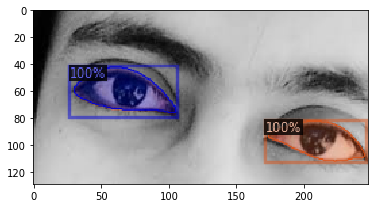

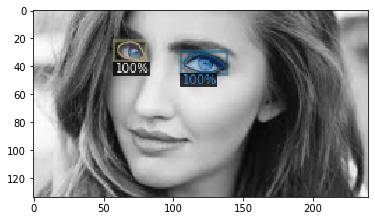

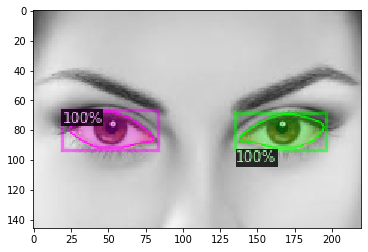

In [18]:
from detectron2.utils.visualizer import ColorMode
eye_val_dicts = load_coco_json("./eye/train/train.json", "eye/train")
for d in eye_val_dicts: 
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=eye_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    #cv2_imshow(v.get_image()[:, :, ::-1])
    plt.imshow(v.get_image())
    plt.show()

In [19]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("eye_train", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "eye_train")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [06/07 23:02:56 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/07 23:02:56 d2.data.datasets.coco]: Loaded 3 images in COCO format from ./eye/train/train.json
[06/07 23:02:56 d2.data.common]: Serializing 3 elements to byte tensors and concatenating them all ...
[06/07 23:02:56 d2.data.common]: Serialized dataset takes 0.00 MiB
[06/07 23:02:56 d2.evaluation.evaluator]: Start inference on 3 images
[06/07 23:02:56 d2.evaluation.evaluator]: Total inference time: 0:00:00.087503 (0.087503 s / img per device, on 1 devices)
[06/07 23:02:56 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.061553 s / img per device, on 1 devices)
[06/07 23:02:56 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/07 23:02:56 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[06/07 23:02:56 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading

OrderedDict([('bbox',
              {'AP': 98.31683168316832,
               'AP50': 100.0,
               'AP75': 100.0,
               'APs': 95.04950495049505,
               'APm': 100.0,
               'APl': nan}),
             ('segm',
              {'AP': 97.77227722772277,
               'AP50': 100.0,
               'AP75': 100.0,
               'APs': 92.52475247524752,
               'APm': 100.0,
               'APl': nan})])

# Other types of builtin models

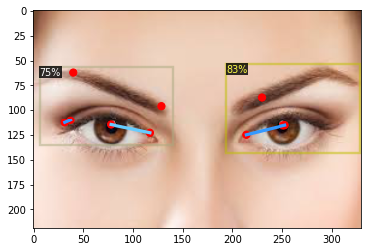

In [23]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2_imshow(v.get_image()[:, :, ::-1])
plt.imshow(v.get_image())
plt.show()

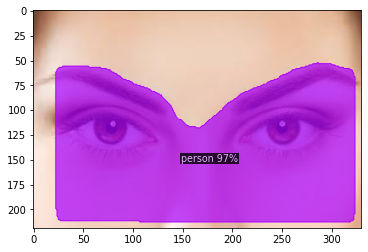

In [24]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
#cv2_imshow(v.get_image()[:, :, ::-1])
plt.imshow(v.get_image())
plt.show()

# Run panoptic segmentation on a video

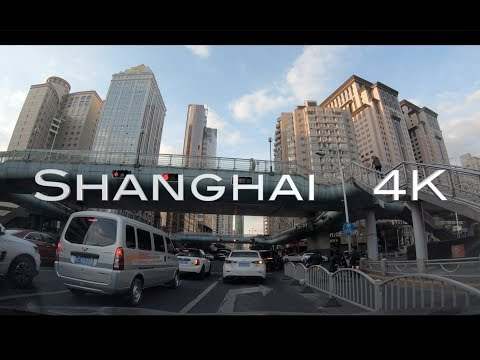

In [25]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("ll8TgCZ0plk", width=500)
display(video)

In [28]:
# Install dependencies, download the video, and crop 5 seconds for processing
#!pip install youtube-dl
#!pip uninstall -y opencv-python opencv-contrib-python
#!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=ll8TgCZ0plk -f 22 -o video.mp4
#!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4
!ffmpeg -i video.mp4 -t 00:00:06    -strict -2   -c:v copy video-clip.mp4

[youtube] ll8TgCZ0plk: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 404.40MiB in 07:37.55KiB/s ETA 00:00nown ETA
ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libs

In [50]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes)
# Using a model trained on COCO dataset
#!git clone https://github.com/facebookresearch/detectron2
#!detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
#  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
!python /home/ny/detectron2_uninstalled/demo/demo.py --config-file /home/ny/detectron2_uninstalled/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml \
  --video-input video-clip.mp4 --confidence-threshold 0.6 --output /home/ny/Codes/detectron2/video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
    

[06/07 22:51:21 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='/home/ny/detectron2_uninstalled/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='/home/ny/Codes/detectron2/video-output.mkv', video_input='video-clip.mp4', webcam=False)
[06/07 22:51:23 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[06/07 22:51:23 fvcore.common.file_io]: URL https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl cached in /home/ny/.torch/fvcore_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[06/07 22:51:24 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
0it [00:00, ?it/s]


In [40]:
# Download the results
from google.colab import files
files.download('video-output.mkv')

ModuleNotFoundError: No module named 'google.colab'